## 1.) Importing Library's for image classification
* First I did use my own analysis and skills to classify these
* Second I used mobilenet-v2 to classify they both give best accuray    

In [38]:
## Importing library for image classification

import os

import numpy as np
import tensorflow as tf

from tensorflow import keras
from zipfile import ZipFile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

## 1.1) Extracting Zip file to start preprocessing

In [39]:
## Extracting files

loc = "/content/New folder (2).zip"
f = ZipFile(loc, 'r')
f.extractall()
f.close()

In [40]:
## Splitting data into train and validation


train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/New folder (2)',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/New folder (2)',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32,
)

Found 1162 files belonging to 1 classes.
Using 930 files for training.
Found 1162 files belonging to 1 classes.
Using 232 files for validation.


## 1.2) Creating model using keras and tensorflow used
* Doing image classification on (256, 256, 3) image size

In [41]:
## Creating model on using image shape

model = Sequential()

model.add(Conv2D(32, kernel_size= (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(32, kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(32, kernel_size= (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 1.3) Checking summary

In [42]:
## Checking model summary

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,706,049 (14.14 MB)

 Trainable params: 3,706,049 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
## Model compilation

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [44]:
## fitting model and putting it in history variable

history = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 1.0000 - loss: 1.9010e-07 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms

In [45]:
import tensorflow as tf # Import tensorflow if not already imported

# Instead of using train_ds[0], try iterating through the dataset and taking a batch
for image_batch, labels_batch in train_ds.take(1):  # Take one batch from the dataset
    predictions = model.predict(image_batch)
    break # Exit loop after processing one batch

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


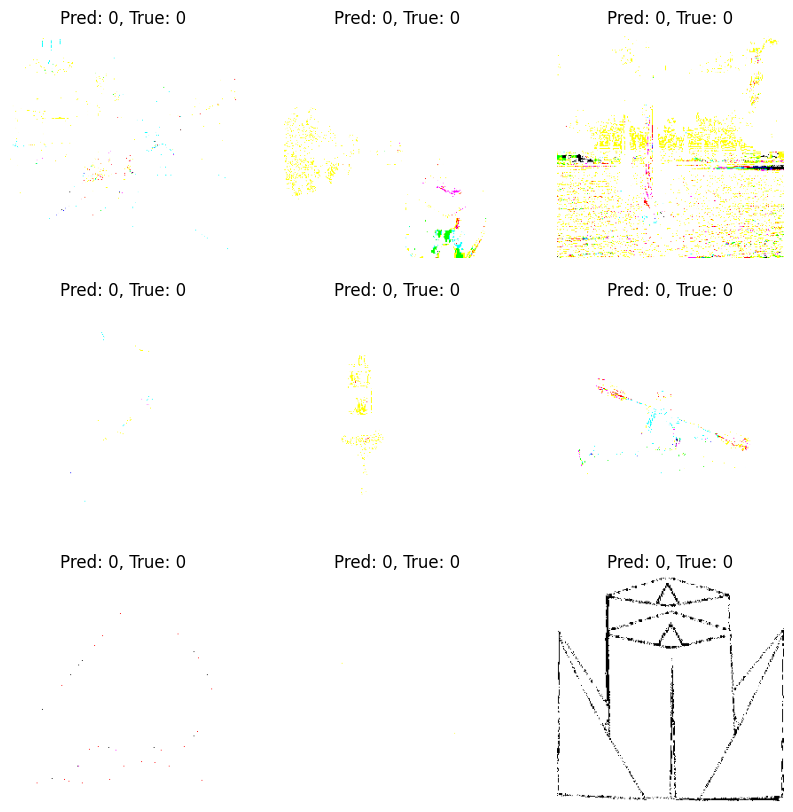

In [46]:
# Fetch a batch of validation images and labels
image_batch, label_batch = next(iter(val_ds))
predictions = model.predict(image_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy())
    predicted_label = np.argmax(predictions[i])
    true_label = label_batch[i]
    plt.title(f"Pred: {predicted_label}, True: {true_label}")
    plt.axis("off")
plt.show()


In [48]:
image_batch, label_batch = next(iter(val_ds))
predictions = model.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [49]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {val_accuracy:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation accuracy: 1.00


### 1.4) Starting Mobile net-v2 for image classification



In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Set up directory path
data_dir = "New folder (2)/boat_type_classification_dataset"  # Update if necessary

# Load and split dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Normalize the data
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds1 = val_ds1.map(lambda x, y: (normalization_layer(x), y))

# Load the MobileNetV2 model with pre-trained weights, excluding the top layers
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom layers for classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(train_ds.cardinality().numpy(), activation='softmax')  # Number of classes from the dataset
])

Found 1162 files belonging to 9 classes.
Using 930 files for training.
Found 1162 files belonging to 9 classes.
Using 232 files for validation.


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 316ms/step - accuracy: 0.7933 - loss: 0.6090 - val_accuracy: 0.7716 - val_loss: 0.7241
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.8971 - loss: 0.3108 - val_accuracy: 0.7931 - val_loss: 0.6713
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.9445 - loss: 0.1784 - val_accuracy: 0.7931 - val_loss: 0.6732
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9690 - loss: 0.1189 - val_accuracy: 0.8017 - val_loss: 0.6576
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9858 - loss: 0.0726 - val_accuracy: 0.7974 - val_loss: 0.7200
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.9916 - loss: 0.0556 - val_accuracy: 0.8190 - val_loss: 0.6794
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9983 - loss: 0.0413 - val_accuracy: 0.7845 - val_loss: 0.8284
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.9952 - loss: 0.0322 - val_accuracy: 

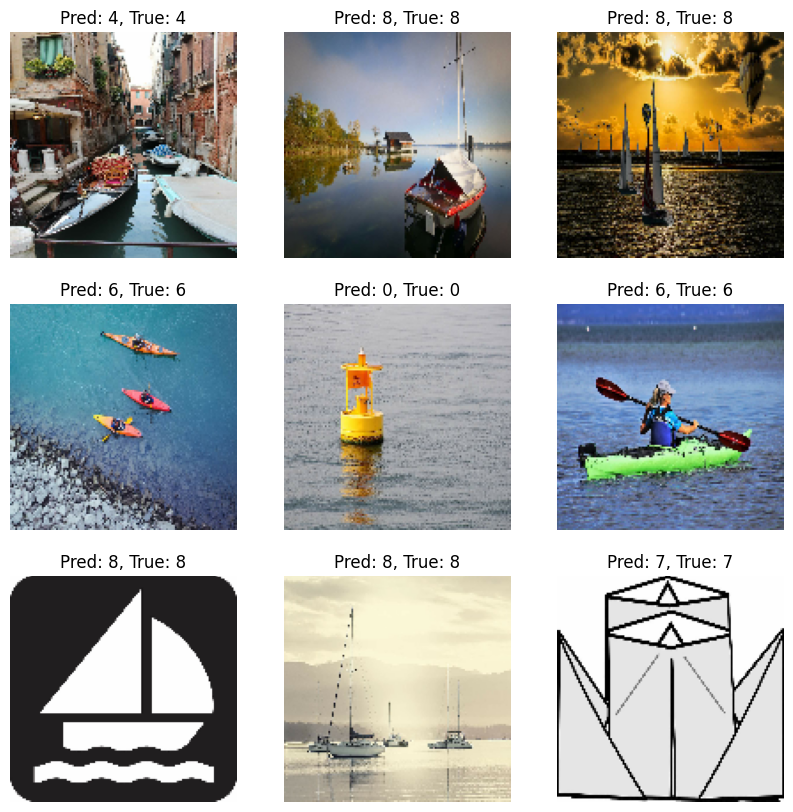

In [52]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds1, epochs=10)

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {val_accuracy:.2f}")

# Visualize some predictions (optional)
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of validation images and labels
image_batch, label_batch = next(iter(val_ds1))
predictions = model.predict(image_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy())
    predicted_label = np.argmax(predictions[i])
    true_label = label_batch[i]
    plt.title(f"Pred: {predicted_label}, True: {true_label}")
    plt.axis("off")
plt.show()


In [53]:
val_loss, val_accuracy = model.evaluate(val_ds1)
print(f"Validation accuracy: {val_accuracy:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7809 - loss: 0.8897
Validation accuracy: 0.79


In [54]:
image_batch, label_batch = next(iter(val_ds1))
predictions = model.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
